<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание-1." data-toc-modified-id="Задание-1.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание 1.</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Что-нужно-сделать?" data-toc-modified-id="Что-нужно-сделать?-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Что нужно сделать?</a></span></li></ul></li></ul></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 3</a></span></li></ul></div>

<a target="_blank" href="https://colab.research.google.com/github/da-python/new-modul-python/blob/main/Lesson3/hometask/SyntheticRubber.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [60]:
!pip install xlsxwriter

     -------------------------------------- 152.8/152.8 kB 1.0 MB/s eta 0:00:00


In [3]:
!pip install yfinance

In [114]:
import yfinance as yf
import pandas as pd
import requests
from tqdm.auto import tqdm
import time
import datetime
import matplotlib.pyplot as plt
import xlsxwriter
import os

In [3]:
crude_oil_ticker = "CL=F"
crude_oil = yf.Ticker(crude_oil_ticker)
# hist = crude_oil.history()
oil_data = yf.download(crude_oil_ticker)

[*********************100%***********************]  1 of 1 completed


In [4]:
eurusd_ticker = "EURUSD=X"
eurusd = yf.Ticker(eurusd_ticker)
eurusd_data = yf.download(eurusd_ticker)

[*********************100%***********************]  1 of 1 completed


In [6]:
oil_eurusd_data = pd.concat([oil_data, eurusd_data], axis=1, keys=['Oil_price','Euro_rate'])
oil_eurusd_data

,Oil_price,Euro_rate
Date,,
2022-04-11,94.290001,1.088495
2022-04-12,100.599998,1.087796
2022-04-13,104.250000,1.082614
2022-04-14,106.949997,1.089657
2022-04-15,NaN,1.082099
...,...,...
2023-04-05,80.610001,1.096011
2023-04-06,80.699997,1.090334
2023-04-07,NaN,1.092013


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [142]:
# Затраты на производство
PCOST = 400 # (EUR)

# Надбавка
N = 0.4

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Сonty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Ant':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


In [143]:
customers

{'Сonty': {'location': 'EU', 'volumes': 200, 'comment': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'comment': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'comment': 'moving_average'},
 'Ant': {'location': 'EU', 'volumes': 70, 'comment': 'monthly'}}

In [10]:
def discount_percent(volume: int)->int:
    if volume < 0 :
        return 0.0
    if volume < 99 :
        return 0.01
    if volume < 299 :
        return 0.05
    if volume > 300 :
        return 0.1


In [144]:
base_price = oil_eurusd_data.copy()
base_price['price'] = base_price.Oil_price*10+ck_data.Euro_rate*PRODUCTION_COST+(PRODUCTION_COST*N)
base_price.to_csv(r'C:\Users\pride\1.csv')

In [145]:
base_price

,Oil_price,Euro_rate,price
Date,,,
2022-04-11,94.290001,1.088495,1538.297873
2022-04-12,100.599998,1.087796,1601.118374
2022-04-13,104.250000,1.082614,1635.545721
2022-04-14,106.949997,1.089657,1665.362749
2022-04-15,NaN,1.082099,NaN
...,...,...,...
2023-04-05,80.610001,1.096011,1404.504232
2023-04-06,80.699997,1.090334,1403.133640
2023-04-07,NaN,1.092013,NaN


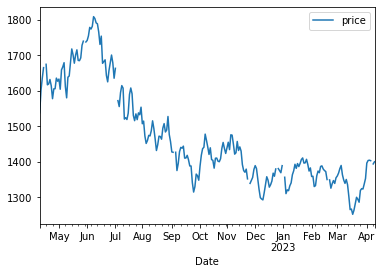

In [146]:
base_price.plot(y='price')

### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [131]:
url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month=01&year=2000"
res = requests.get(url)
rj = res.json()
df = pd.json_normalize(rj) 
df = df[0:0] 
end = datetime.datetime.today().date()
start = end-datetime.timedelta(days=365)
period_df = pd.date_range(start, end, freq = 'M')
period_lst = period_df.to_pydatetime().tolist()
for i in tqdm(period_lst):
    url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={str(i.month)}&year={str(i.year)}"
    res = requests.get(url)
    rj = res.json()
    df1 = pd.json_normalize(rj)
    df = pd.concat([df, df1], ignore_index=True)
    time.sleep(3)

In [132]:
dft = df.copy()
dft = dft[dft['us'] != '']
dft['Rubber_Price'] = dft['us'].apply(lambda i:float(i)*10)
dft = dft.drop([ 'masa', 'rm', 'us', 'tone'], axis=1)
dft.head(10)

,date,grade,Rubber_Price
0,2022-04-29,SMR CV,2569.5
1,2022-04-29,SMR L,2546.0
2,2022-04-29,SMR 5,1652.5
3,2022-04-29,SMR GP,1645.5
4,2022-04-29,SMR 10,1629.0
5,2022-04-29,SMR 20,1624.5
6,2022-04-29,Latex in Bulk,6495.0
7,2022-04-28,SMR CV,2551.0
8,2022-04-28,SMR L,2527.5
9,2022-04-28,SMR 5,1621.5


In [147]:
df1 = pd.read_csv(r'C:\Users\pride\1.csv')
df2 = pd.read_csv(r'C:\Users\pride\2.csv')

In [148]:
df1.head()

,Date,Oil_price,Euro_rate,price
0,2022-04-11,94.290001,1.088495,1538.297873
1,2022-04-12,100.599998,1.087796,1601.118374
2,2022-04-13,104.250000,1.082614,1635.545721
3,2022-04-14,106.949997,1.089657,1665.362749
4,2022-04-15,NaN,1.082099,NaN


In [149]:
df2.head()

,date,Latex in Bulk,SMR 10,SMR 20,SMR 5,SMR CV,SMR GP,SMR L
0,2023-01-03,4725.0,1347.0,1342.0,1370.0,1867.0,1363.0,1844.0
1,2023-01-04,4725.0,1350.0,1345.5,1373.0,1862.0,1366.0,1839.0
2,2023-01-05,4725.0,1350.0,1345.5,1373.0,1865.0,1366.0,1842.0
3,2023-01-06,4710.0,1332.0,1327.5,1355.5,1860.0,1348.5,1837.0
4,2023-01-09,4710.0,1348.0,1343.5,1371.0,1867.5,1364.5,1844.5


In [150]:
df1 = df1.rename(columns={'Date': 'date'})
df2 = df2.rename(columns={'date': 'date'})

In [151]:
print(df1.columns)
print(df2.columns)

Index(['date', 'Oil_price', 'Euro_rate', 'price'], dtype='object')
Index(['date', 'Latex in Bulk', 'SMR 10', 'SMR 20', 'SMR 5', 'SMR CV',
       'SMR GP', 'SMR L'],
      dtype='object')


In [153]:
erged_df = pd.merge(df1, df2, on='date', suffixes=('_df1', '_df2'))

In [154]:
erged_df.head()

,date,Oil_price,Euro_rate,price,Latex in Bulk,SMR 10,SMR 20,SMR 5,SMR CV,SMR GP,SMR L
0,2023-01-03,76.930000,1.067771,1356.408577,4725.0,1347.0,1342.0,1370.0,1867.0,1363.0,1844.0
1,2023-01-04,72.839996,1.054685,1310.274153,4725.0,1350.0,1345.5,1373.0,1862.0,1366.0,1839.0
2,2023-01-05,73.669998,1.060637,1320.954590,4725.0,1350.0,1345.5,1373.0,1865.0,1366.0,1842.0
3,2023-01-06,73.769997,1.052222,1318.588676,4710.0,1332.0,1327.5,1355.5,1860.0,1348.5,1837.0
4,2023-01-09,74.629997,1.065632,1332.552910,4710.0,1348.0,1343.5,1371.0,1867.5,1364.5,1844.5


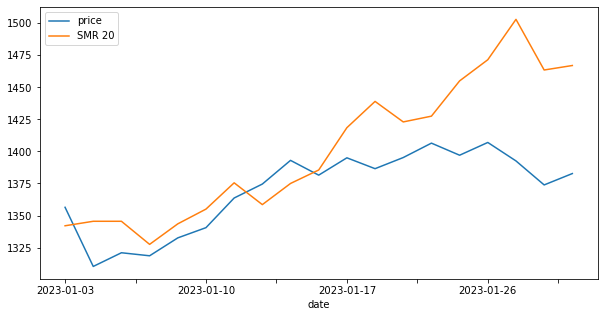

In [155]:
erged_df.plot(x='date', y=['price', 'SMR 20'], figsize=(10,5))

# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [158]:
crude_oil_ticker = "CL=F"
crude_oil = yf.Ticker(crude_oil_ticker)
oil_data = yf.download(crude_oil_ticker)
eurusd_ticker = "EURUSD=X"
eurusd = yf.Ticker(eurusd_ticker)
eurusd_data = yf.download(eurusd_ticker)

oil_data = oil_data['Close'].copy()
eurusd_data = eurusd_data['Close'].copy()
current_day = datetime.datetime.today().date()
year_ago_day = current_day-datetime.timedelta(days=365)
current_day = datetime.datetime.strftime(current_day, '%Y-%m-%d')
year_ago_day = datetime.datetime.strftime(year_ago_day, '%Y-%m-%d')
oil_data = oil_data[year_ago_day:current_day].copy()
eurusd_data = eurusd_data[year_ago_day:current_day].copy()


month_oil_df = pd.concat([oil_data.resample('M').mean(), eurusd_data.resample('M').mean()], axis=1, keys=['Oil_price','Euro_rate'])
month_oil_df['CK_price'] = month_oil_df.Oil_price*10+month_oil_df.Euro_rate*PRODUCTION_COST+(PRODUCTION_COST*N)

# по клиентам
clients_path = 'for_clients'
os.makedirs(clients_path, exist_ok=True)

for client_name, client_info in customers.items():
  client_df = month_oil_df.copy()
  
  if client_info.get('location') == 'EU':
    client_df['logistics'] = EU_LOGISTIC_COST_EUR
    client_df['logistics'] = client_df['Euro_rate'] * EU_LOGISTIC_COST_EUR
  elif client_info.get('location') == 'CN':
    client_df['logistics'] = CN_LOGISTIC_COST_USD
  
  if client_info.get('volumes'):
    client_df['volumes'] = client_info.get('volumes')

  client_df['discount'] = client_df['volumes'].apply(discount_percent)
  client_df['CK_price_usd'] = client_df['CK_price'] * (1-client_df['discount']) + client_df['logistics']
  
  client_df['CK_price_usd'].plot(color='red', linestyle="dashed")
  plt.title(f"Client {client_name} CK Price")
  plt.ylabel("USD")
  plt.tight_layout()
  plt.savefig(f'{client_name}_CK_price.png')
  plt.close()

  client_df = client_df.round(2)
  client_df = client_df.reset_index()
  client_df.Date = client_df.Date.dt.strftime('%B %Y')
  
  max_row, max_col = client_df.shape

  xlfilepath = os.path.join(clients_path, f'{client_name}_CK_prices.xlsx')
  with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:
    client_df.to_excel(writer, sheet_name=client_name, startrow=1, header=False, index=False)
    workbook = writer.book
    worksheet = writer.sheets[client_name]
    column_settings = [{'header': column} for column in client_df.columns]
    worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
    worksheet.insert_image(max_row + 3, 1, f'{client_name}_CK_price.png')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [159]:
current_day = datetime.datetime.today().date()
date_lst = [current_day-datetime.timedelta(days=i) for i in range(365)]
date_lst = sorted(date_lst)
date = current_day-datetime.timedelta(days=365)
fdate=datetime.datetime.strftime(date, '%d-%m-%Y')
url = f"http://www.cbr.ru/scripts/XML_daily.asp?date_req={fdate}"
res = requests.get(url)
rj = res.text
rate_df = pd.read_xml(rj)
rate_df = rate_df[(rate_df['NumCode'] == 840) | (rate_df['NumCode'] == 978)]
rate_df['Date'] = date
for i in tqdm(date_lst):
    fdate=datetime.datetime.strftime(i, '%d-%m-%Y')
    url = f"http://www.cbr.ru/scripts/XML_daily.asp?date_req={fdate}"
    res = requests.get(url)
    rj = res.text
    df = pd.read_xml(rj)
    df = df[(df['NumCode'] == 840) | (df['NumCode'] == 978)]
    df['Date'] = i
    rate_df = pd.concat([rate_df,df])

rate_df['Date'] = rate_df['Date'].astype("datetime64[ns]")
rate_df['Value'] = rate_df['Value'].apply(lambda x:float(x.replace(',','.')))
rate_df = rate_df.reset_index()
rate_df = rate_df.set_index(['Date'])
rate_df = rate_df[['CharCode','Value']]
rate_df = rate_df.pivot(columns='CharCode',values = 'Value')
rate_df = rate_df.resample('M').mean()
rate_df

CharCode,EUR,USD
Date,,
2022-04-30,82.365240,76.412260
2022-05-31,67.626332,64.776987
2022-06-30,60.182637,57.269417
2022-07-31,59.109713,58.151513
2022-08-31,61.026758,60.352229
2022-09-30,59.288300,59.800640
2022-10-31,59.646913,60.906352
2022-11-30,61.869623,60.878093
2022-12-31,69.251052,65.439506


In [160]:
rus_price_df = pd.merge(month_oil_df, rate_df, how='inner', left_index=True, right_index=True)
rus_price_df['Discount'] = discount_percent(0)
rus_price_df['CK_price_rub']=rus_price_df['CK_price']*rus_price_df['USD']*(1-discount_percent(0))
rus_price_df = rus_price_df[['CK_price','USD','Discount','CK_price_rub']]
rus_price_df = rus_price_df.rename(columns={'CK_price':'CK_price_usd','USD':'Rate USD'})
rus_price_df

,CK_price_usd,Rate USD,Discount,CK_price_rub
Date,,,,
2022-04-30,1617.949269,76.412260,0.01,122394.848585
2022-05-31,1675.524189,64.776987,0.01,107450.054687
2022-06-30,1724.608731,57.269417,0.01,97779.662658
2022-07-31,1561.648619,58.151513,0.01,89904.107529
2022-08-31,1479.945681,60.352229,0.01,88424.840463
2022-09-30,1394.485568,59.800640,0.01,82557.218145
2022-10-31,1423.897686,60.906352,0.01,85857.168993
2022-11-30,1411.275922,60.878093,0.01,85056.629450
2022-12-31,1348.489233,65.439506,0.01,87362.025134


In [161]:
xlfilepath = 'CK_offer_rus.xlsx'
with pd.ExcelWriter(xlfilepath, engine='xlsxwriter') as writer:    
        client_df =  rus_price_df.copy()
        client_df['CK_price_rub'].plot(color='red', linestyle="dashed")
        plt.title(f"Client RUS CK Price")
        plt.ylabel("RUB")
        plt.tight_layout()
        plt.savefig(f'RUS_CK_price.png')
        plt.close()

        client_df = client_df.round(2)
        client_df = client_df.reset_index()
        client_df.Date = client_df.Date.dt.strftime('%B %Y')

        max_row, max_col = client_df.shape
        client_df.to_excel(writer, sheet_name='RUS', startrow=1, header=False, index=False)
        workbook = writer.book
        worksheet = writer.sheets['RUS']
        column_settings = [{'header': column} for column in client_df.columns]
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
        worksheet.insert_image(max_row + 3, 1, f'RUS_CK_price.png')